Hough Transform with Function

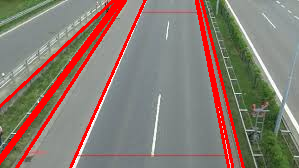

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image and convert to grayscale
img = cv2.imread('/content/images (5).jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection
edges = cv2.Canny(gray, 80, 200, apertureSize=3)

# Apply Hough transform
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=120)

# Draw detected lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



Hough Transform without Function


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
def read_image(image_path):
  img = cv2.imread('/content/imgg.jpg', cv2.IMREAD_GRAYSCALE)
  if img is None:
    print("Error: Image not found.")
  return img

# Hough transform, voting process
def hough_transform(edges):
  rows, cols = edges.shape
  print(rows, cols)
  max_dist = int(np.hypot(rows,cols))
  print(max_dist)

  thetas = np.deg2rad(np.arange(-90, 90, 0.5))
  print(thetas)
  rhos = np.linspace(-max_dist, max_dist, max_dist * 2)

  accumulator = np.zeros((max_dist*2, len(thetas)))
  print(accumulator.shape)

  #Step 3: Voting in accumulator
  for y in range(rows):
    for x in range(cols):
      if edges[y,x]:
        for t in range(len(thetas)):
          rho = int((x * np.cos(thetas[t]) + y * np.sin(thetas[t])))
          rho_idx = rho + max_dist
          accumulator[rho_idx, t] += 1

  return accumulator, thetas, rhos


#peaks /top lines
def peak_lines(accumulator, theta_range, rho_range, threshold= 150):
  lines=[]
  max_dist= len(rho_range)//2
  for rho_idx in range(accumulator.shape[0]):
    for theta_idx in range(accumulator.shape[1]):
      if accumulator[rho_idx, theta_idx] > threshold:
        rho = rho_range[rho_idx]
        theta = theta_range[theta_idx]
        lines.append((rho,theta))
  return lines


def plot_detected_lines(image,lines):
  fig, ax = plt.subplots()
  ax.imshow(image, cmap='gray')

  for rho,theta in lines:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    x2 = int(x0 - 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    y2 = int(y0 - 1000 * (a))
    ax.plot((x1, x2), (y1, y2), '-r')  # Plot lines in red

  plt.show()

  # Plot accumulator
def plot_accumulator(accumulator, theta_range, rho_range):
    plt.imshow(accumulator, cmap='hot', extent=[np.rad2deg(theta_range[-1]), np.rad2deg(theta_range[0]), rho_range[-1], rho_range[0]], aspect='auto')
    plt.title('Hough Accumulator')
    plt.xlabel('Theta (degrees)')
    plt.ylabel('Rho (pixels)')
    plt.show()


450 650
790
[-1.57079633 -1.56206968 -1.55334303 -1.54461639 -1.53588974 -1.5271631
 -1.51843645 -1.5097098  -1.50098316 -1.49225651 -1.48352986 -1.47480322
 -1.46607657 -1.45734993 -1.44862328 -1.43989663 -1.43116999 -1.42244334
 -1.41371669 -1.40499005 -1.3962634  -1.38753676 -1.37881011 -1.37008346
 -1.36135682 -1.35263017 -1.34390352 -1.33517688 -1.32645023 -1.31772359
 -1.30899694 -1.30027029 -1.29154365 -1.282817   -1.27409035 -1.26536371
 -1.25663706 -1.24791042 -1.23918377 -1.23045712 -1.22173048 -1.21300383
 -1.20427718 -1.19555054 -1.18682389 -1.17809725 -1.1693706  -1.16064395
 -1.15191731 -1.14319066 -1.13446401 -1.12573737 -1.11701072 -1.10828408
 -1.09955743 -1.09083078 -1.08210414 -1.07337749 -1.06465084 -1.0559242
 -1.04719755 -1.0384709  -1.02974426 -1.02101761 -1.01229097 -1.00356432
 -0.99483767 -0.98611103 -0.97738438 -0.96865773 -0.95993109 -0.95120444
 -0.9424778  -0.93375115 -0.9250245  -0.91629786 -0.90757121 -0.89884456
 -0.89011792 -0.88139127 -0.87266463 -0.8

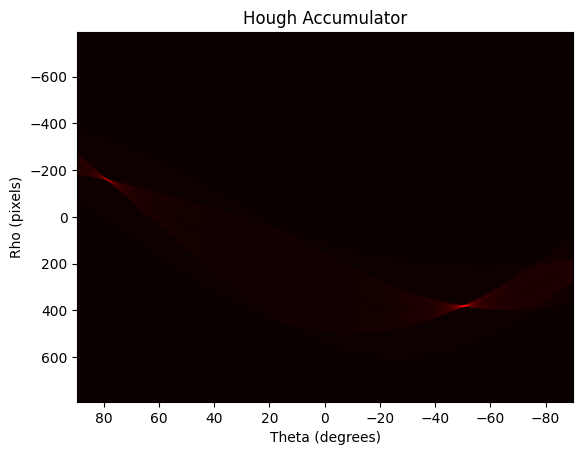

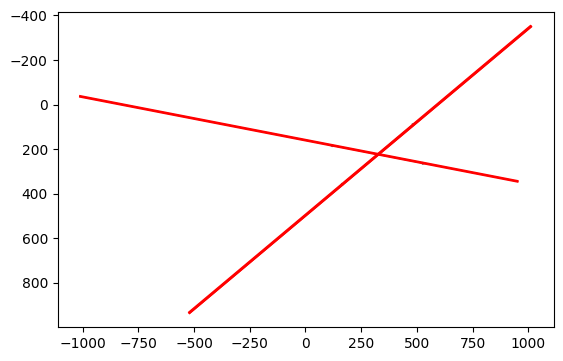

In [2]:
  # Main function to run the Hough Transform
def run_hough_transform(image_path):
    img = read_image(image_path)
    if img is None:
        return

    # Edge detection
    edges = cv2.Canny(img, 50, 150)

    # Apply Hough transform
    accumulator, theta_range, rho_range = hough_transform(edges)

    # Plot accumulator
    plot_accumulator(accumulator, theta_range, rho_range)

    # Detect lines based on a threshold
    lines = peak_lines(accumulator, theta_range, rho_range, threshold=200)

    # Plot the detected lines on the original image
    plot_detected_lines(img, lines)

# Run the Hough Transform
image_path = '/content/imgg.jpg'
run_hough_transform(image_path)